# NYPD Arrest Analysis
LAGCC Data Analytics

Shelley Shen

This analysis aims to analyze and visualize data on NYC arrests made in 2023. 

**Key questions:**
- Which borough had the most arrests?
- What level of offense was most common? Across the boroughs? 
- What jurisdiction was responsible for the most number of arrests? 

**Key features of the dataset:**
- arrest_key: randomly generated persistent ID for each arrest
- arrest_date: exact date of arrest for reported event
- pd_cd: 3 digit internal classification code
- pd_desc: description of internal classification corresponding with PD code
- ky-cd: 3 digit internal classification code
- ofns_desc: description of internal classification corresponding with KY code
- law_code: law code charges corresponding to the NYS penal law
- law_cat_cd: level of offense: felony, misdeameanor, violation
- arrest_boro: borought of arres. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
- arrest_precinct: precinct where the arrest occurred
- jurisdiction_code: jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions
- age_group
- perp_sex: perpetrator's sex description
- per_race: perpetrator's race description
- x_coord_cd: Midblock X-coordinate for New York State Plane Coordinate System
- y_coord_cd: Midblock Y-coordinate for New York State Plane Coordinate System
- latitude
- longitude
- new georeferenced column
- community districts
- borough boundaries
- city council districts
- police precincts
- zip codes 

In [127]:
#load libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
%matplotlib inline

In [128]:
#import data
missing_values = ["n/a", "na", "--", "(null)"]

raw_df = pd.read_csv('https://raw.githubusercontent.com/shelleysh/LAGCC-Data-Analytics-Project-3/main/NYPD_Arrest_Data_Year_to_Date.csv', na_values = missing_values).clean_names()

In [129]:
#review columns in dataset 
raw_df.columns

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'new_georeferenced_column'],
      dtype='object')

In [130]:
#preview data
raw_df.head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,new_georeferenced_column
0,263187871,02/07/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,POINT (-74.117505 40.636362)
1,261368273,01/04/2023,NaN,NaN,NaN,NaN,RPA0076801,M,M,34,0,25-44,F,BLACK,1004287,251338,40.856519,-73.927564,POINT (-73.927564 40.856519)
2,261667175,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
3,264298625,02/27/2023,NaN,NaN,NaN,NaN,PL 2224000,F,Q,113,0,25-44,M,BLACK,1039225,181937,40.665881,-73.801837,POINT (-73.80183654 40.66588105)
4,261516485,01/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539)


## Data Wrangling

In [131]:
#select columns of interest
df=raw_df.loc[:, ['pd_cd', 'pd_desc', 'law_cat_cd', 'arrest_boro', 'jurisdiction_code', 'age_group']]
df

,pd_cd,pd_desc,law_cat_cd,arrest_boro,jurisdiction_code,age_group
0,105.0,STRANGULATION 1ST,F,S,0,25-44
1,NaN,NaN,M,M,0,25-44
2,101.0,ASSAULT 3,M,B,0,18-24
3,NaN,NaN,F,Q,0,25-44
4,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",F,M,0,<18
...,...,...,...,...,...,...
54571,105.0,STRANGULATION 1ST,F,Q,0,25-44
54572,113.0,"MENACING,UNCLASSIFIED",M,M,0,18-24
54573,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",F,Q,0,18-24
54574,101.0,ASSAULT 3,M,Q,0,65+


In [132]:
#rename column
df = df.rename(columns = {'law_cat_cd': 'offense_level'})

In [138]:
#recode values 
df['arrest_boro'] = df['arrest_boro'].replace({'K': 'Brooklyn', 'B': 'Bronx', 'Q': 'Queens', 'M': 'Manhattan', 'S': 'Staten Island'})
df['offense_level'] = df['offense_level'].replace({'F': 'felony', 'M': 'misdemeanor', 'V': 'violation', 'I': 'infarction'})
df['jurisdiction_code'] = df['jurisdiction_code'].replace({0: 'patrol', 1: 'transit', 2: 'housing'})

In [ ]:
#borough with most arrests 
df['arrest_boro'].value_counts()

In [ ]:
#remove law_cat_cd = 9
df['offense_level'] = df[df.offense_level != 9] #failed

In [ ]:
#remove law_cat_cd = 9
df1 = df.drop(df.index[df['offense_level'] == 9], inplace = True) #failed

In [147]:
#exclude law_cat_cd = 9
df1 = df.loc[(df['offense_level'] == 'felony') | (df['offense_level'] == 'violation') | (df['offense_level'] == 'misdemeanor')| (df['offense_level'] == 'infarction')]
df1 = df1.loc[(df1['jurisdiction_code'] == 'housing')|(df1['jurisdiction_code'] == 'patrol')|(df1['jurisdiction_code'] == 'transit')]

In [ ]:
df1

## Data exploration and visualization

In [148]:
#count of offense levels by borough
offense_df = df1.groupby(['offense_level'])['arrest_boro'].count().reset_index(name='count')
offense_df

,offense_level,count
0,felony,22782
1,infarction,67
2,misdemeanor,29575
3,violation,305


In [149]:
#count of arrests by borough
borough_df = df1.groupby(['arrest_boro'])['pd_cd'].count().reset_index(name='count')
borough_df

,arrest_boro,count
0,Bronx,12507
1,Brooklyn,15022
2,Manhattan,11859
3,Queens,10983
4,Staten Island,2293


Text(0, 0.5, 'Count of Arrests')

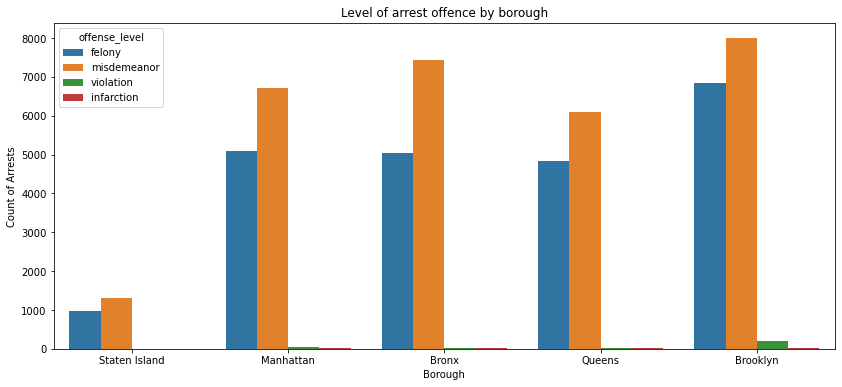

In [150]:
#plot arrest level by borough
plt.figure(figsize=(14, 6))
sns.countplot(data=df1,
            x='arrest_boro',
            hue='offense_level'
           )
plt.title("Level of arrest offence by borough")
plt.xlabel('Borough')
plt.ylabel('Count of Arrests')

In [153]:
#count arrests by jurisdiction
juris_df = df1.groupby(['jurisdiction_code'])['pd_cd'].count().reset_index(name='count')
juris_df

,jurisdiction_code,count
0,housing,2155
1,patrol,48107
2,transit,2402


Text(0, 0.5, 'Count of Jurisdiction Type')

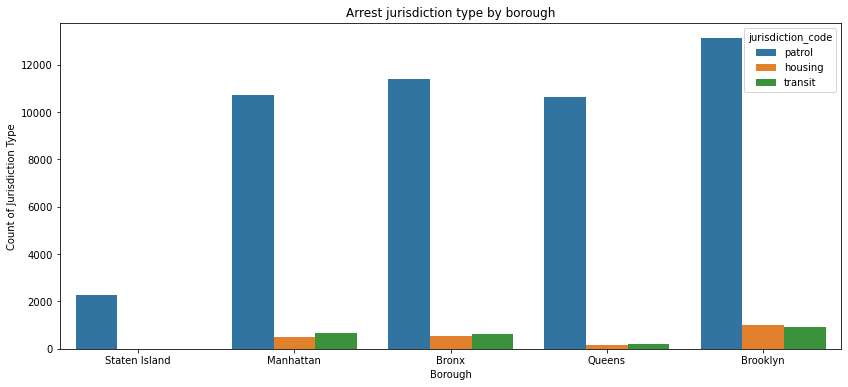

In [155]:
#plot arrest jurisdiction type by borough
plt.figure(figsize=(14, 6))
sns.countplot(data=df1,
            x='arrest_boro',
            hue='jurisdiction_code'
           )
plt.title("Arrest jurisdiction type by borough")
plt.xlabel('Borough')
plt.ylabel('Count of Jurisdiction Type')

In [164]:
#table of jurisdiction type by offense level
df1.groupby(['jurisdiction_code','offense_level']).size().reset_index(name='count')

,jurisdiction_code,offense_level,count
0,housing,felony,713
1,housing,misdemeanor,1432
2,housing,violation,11
3,patrol,felony,21529
4,patrol,infarction,62
5,patrol,misdemeanor,26448
6,patrol,violation,131
7,transit,felony,540
8,transit,infarction,5
9,transit,misdemeanor,1695


## Conclusion 

The analysis shows that the NYC borough with the most arrests is Brooklyn, and both misdemeanors and felonies are most common in Brooklyn. Patrol is the jurisdiction that makes significantly more arrests across all boroughs than either housing or transit. When patrol makes arrests, misdemeanors are the most common offense level follow closely by felony. 

Potential causes of bias in the NYPD Arrest data that can lead to erroneous conclusions include underreporting, disproportionate targeting of specific communities or demographics, racial/ethnic bias, differential enforcement, data entry and recording errors, sampling errors, and lack of contextual information. 
